This notebook shows an example on how to tune the value of a hyperparameter. The example considered is Question [A.2.5](https://nustat.github.io/STAT303-3-class-notes/Assignment%20A.html#tuning-c) of Assignment A, where we need to tune the regularization parameter `C` for a logistic regression model. With this example, you should understand:

1. How to think about the range of values to consider for tuning a hyperparameter.

2. How should the values under consideration be distributed in the range identified in (1).

In [1]:
import time as tm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, confusion_matrix

In [2]:
data = pd.read_csv('./Datasets/classification_data.csv')

X = data.drop(columns= 'hi_int_prncp_pd')
y = data['hi_int_prncp_pd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45, stratify=y)

In [3]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

## Tuning `C` ([A.2.5](https://nustat.github.io/STAT303-3-class-notes/Assignment%20A.html#tuning-c))
With the optimal degree identified in the previous question, find the optimal regularization parameter `C`. Again use the `cross_val_score` function.

*(4 points)*

We are tuning `C` for the optimal degree of 5 identified in one of the previous questions.

In [4]:
poly = PolynomialFeatures(degree = 5)
X_train_poly = poly.fit_transform(X_train_scaled)

## What should be the minimum value of `C` to consider?

- As `C` is the regularization parameter, it cannot be negative. 
- As `C` = 1/lambda, a value of `C` = 0 will mean infinite regularization, which corresponds to an intercept-only model. Also, as the `LogisticRegression()` function computes the value of lambda as `1/C`, it throws a *division by zero error* if `C = 0`. Thus, we should consider `C>0`.
- Even if `C` is positive, but very small, the value of lambda will be too high, which gives rise to numerical errors. Thus, we need to find the minimum value of `C` that is large enough to avoid numerical errors when fitting the model to the given standardized dataset.

We start with an extremely low value of `C = 1e-10`, and check if the model converges. It doesn't converge! If it had converged, we will consider even lower values of `C`. However, in this case, it fails to converge indicating the possibility that this value of `C` is too small to avoid numerical errors. We keep increasing the order of `C` until we don't see convergence errors. With the code below, we find that for values of `C` starting from `1e-6`, the algorithm successfully converges. Thus, the minimum value of `C` that we consider will be `1e-6`. 

In the plot below, we also see that as we increase `C` starting from `C = 1e-6`, the model coefficients change, which may potentially change model fit and accuracy. Thus, we should consider increasing values of `C` starting from `C = 1e-6`.

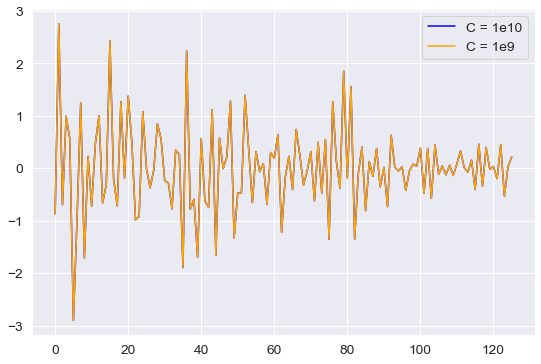

In [10]:
sns.set(font_scale=1.25)
plt.rcParams["figure.figsize"] = (9,6)
model = LogisticRegression(solver = 'newton-cg', C = 1e10).fit(X_train_poly, y_train)
model2 = LogisticRegression(solver = 'newton-cg', C = 1e9).fit(X_train_poly, y_train)
plt.plot(range(126), model.coef_[0,:], color = 'blue', label = "C = 1e10")
plt.plot(range(126), model2.coef_[0,:], color = 'orange', label = "C = 1e9")
plt.legend();